In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# this data set contains the most relevant alarms 
data = pd.read_csv('./dataframes/clean_data.csv')
data_bck=data.copy()

# All alarms

## Alarms sets creation

In [3]:
data.head()

,Unnamed: 0,DateTime,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,...,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences
0,0,2022-01-03 05:49:49,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,...,2022-01,NaN,1,0,0,1,NaN,0,0.0,0
1,1,2022-01-03 08:41:45,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,...,2022-01,10316.0,1,0,0,1,1.0,0,0.0,0
2,2,2022-01-03 08:44:22,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,...,2022-01,157.0,0,0,1,1,1.0,0,0.0,0
3,3,2022-01-03 08:46:40,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,...,2022-01,138.0,0,0,1,1,1.0,0,0.0,0
4,4,2022-01-03 09:07:11,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,...,2022-01,1231.0,1,0,0,1,1.0,0,0.0,0


In [4]:
data.Type.value_counts()

Alarm      224570
Message     71782
Warning     51142
Name: Type, dtype: int64

In [14]:
transactions = data.groupby('sequences')['MsgNr'].apply(list).tolist()
transactions.pop(0)
transactions[166]

[11232, 11231, 11231, 11231, 11231, 11231, 11231, 11231, 11231, 11232]

In [5]:
data_bck = data.copy()

In [15]:
len(transactions)

47597

In [16]:
sum(len(i) for i in transactions)

313717

## Validation of sets

In [7]:
data['Plant'].unique()

array(['L-Ende UV136', 'Emissionsmessung', 'Rekuperator', 'ACON/E-Welle',
       'BiMi-Lager',
       'Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â¤g',
       'LiniensÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â¤gen',
       'Abfallbeh. UV42', 'ACON', 'CO_Curingoven', 'Div_Saw', 'Wickler',
       'Bindemittel', 'Sammelkam.', 'Chargierung', 'LiniensÃ¤gen',
       'LiniensÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â¤gen',
       'Schw.SpaltsÃ¤g',
       'Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Âƒ

Chargierung - -Rekuperator/BiMi-Lager - Bindemittel', 'Sammelkam- ACON/E-Welle /ACON - CO_Curingoven - Schw.Spalts/LiniensÃƒÂƒÃ/Div_Saw - Wickler- L-Ende UV136 - Abfallbeh. UV42

data['new_output'] = data['output'].shift(-1)
data['sequences'] = data['output']
data.loc[data['new_output'] >= data['output'], 'sequences'] = data['new_output']
data[:15]

## Alarm Exploration

### Chattering Alarms

In [8]:
#total number of alarms in sets
alarms_in_transactions = sum([len(sublist) for sublist in transactions])
print('total number of alarms in sets:', alarms_in_transactions)

total number of alarms in sets: 313717


In [9]:
#removing chattering alarms
transactions_clean = [set(i) for i in transactions]

#count number of unique alarms per set
number_clean = sum([len(sublist) for sublist in transactions_clean])
print('total unique alarms in sets', number_clean)

total unique alarms in sets 109723


Text(0, 0.5, 'times')

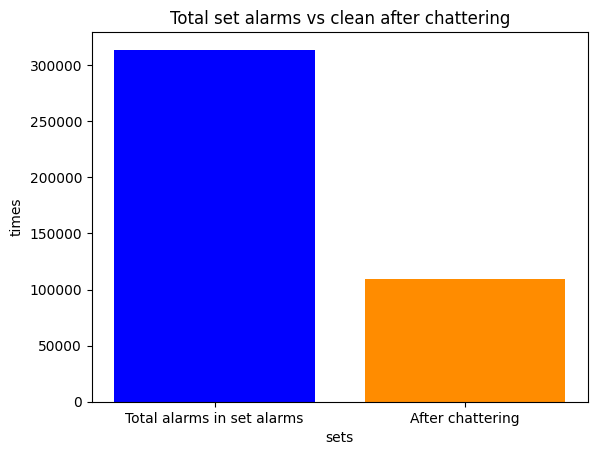

In [10]:
# plot the results
plt.bar(['Total alarms in set alarms', 'After chattering'], [alarms_in_transactions, number_clean], color = ["blue", "darkorange"])
plt.title('Total set alarms vs clean after chattering')
plt.xlabel("sets")
plt.ylabel("times")

### Plotting alarms

In [11]:
#select the first alarm of each set
activation_alarms = [item[0] for item in transactions]

In [12]:
# count how many times one alarm is the activation
df = pd.DataFrame(activation_alarms, columns=['MsgNr'])
grouped_activation = pd.DataFrame(df.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'times'})
grouped_activation.head()

,times
MsgNr,
2421,411
2445,411
4074,685
4203,1464
6269,671


In [13]:
# count the total number of alarms (including the repeated)
flat_alarms = [item for sublist in transactions for item in sublist]
df_alarms = pd.DataFrame(flat_alarms, columns = ['alarms'])
grouped_total = pd.DataFrame(df_alarms.groupby(['alarms'])['alarms'].count()).rename(columns={'alarms': 'times'})
grouped_total.head()

,times
alarms,
2421,1397
2445,1989
4074,2125
4203,4489
6269,1572


In [14]:
# count the total number of alarms (excluding the repeated)
after_chattering_list = [item for sublist in transactions_clean for item in sublist]
df_chattering = pd.DataFrame(after_chattering_list, columns = ['alarms'])
grouped_total_chattering = pd.DataFrame(df_chattering.groupby(['alarms'])['alarms'].count()).rename(columns={'alarms': 'times'})
grouped_total_chattering.head()

,times
alarms,
2421,867
2445,626
4074,1919
4203,3428
6269,811


In [17]:
# grouped_total_chattering.rename(columns={'times_chatter': 'chatter'}, inplace=True)
# grouped_activation.rename(columns={'times_activation': 'activation'}, inplace=True)

In [15]:
df_merged = grouped_total_chattering.merge(grouped_activation, how= "inner", left_index=True, right_index=True)
df_merged['difference'] = df_merged['times_x'] - df_merged['times_y']
df_merged.head()

,times_x,times_y,difference
alarms,,,
2421,867,411,456
2445,626,411,215
4074,1919,685,1234
4203,3428,1464,1964
6269,811,671,140


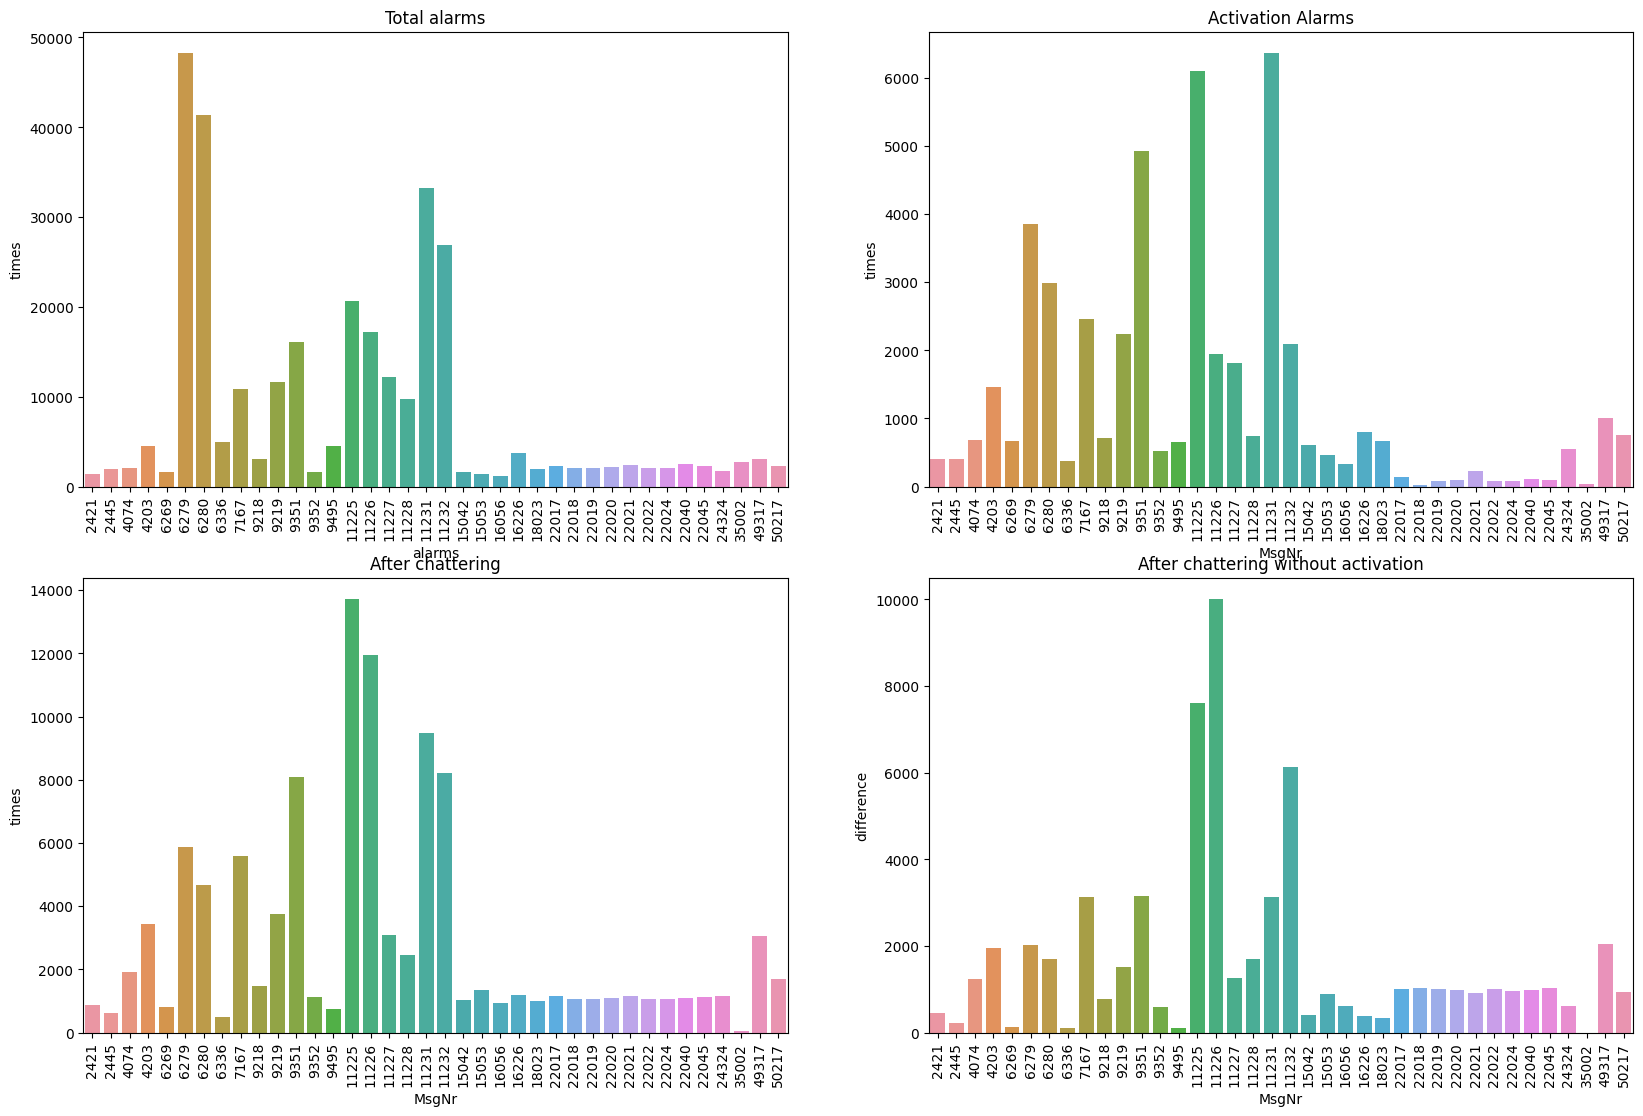

In [16]:
fig, axs = plt.subplots(nrows = 2, ncols= 2, figsize=(20,13))


axs[0,0] = sns.barplot(data=grouped_total, x=grouped_total.index, y='times', ax=axs[0,0])
axs[0,0].tick_params(axis='x', labelrotation=90)
axs[0,0].set_title("Total alarms")

sns.barplot(data=grouped_activation, x=grouped_activation.index, y='times', ax=axs[0, 1])
axs[0, 1].tick_params(axis='x', labelrotation=90)
axs[0, 1].set_title("Activation Alarms")

sns.barplot(data=grouped_total_chattering, x=grouped_activation.index, y='times', ax=axs[1,0])
axs[1, 0].tick_params(axis='x', labelrotation=90)
axs[1, 0].set_title("After chattering")

sns.barplot(data=df_merged, x=grouped_activation.index, y='difference', ax=axs[1,1])
axs[1, 1].tick_params(axis='x', labelrotation=90)
axs[1, 1].set_title("After chattering without activation")




# Display the pie charts
plt.show()

## Apriori

In [20]:
from apyori import apriori

In [21]:
rules = apriori(transactions, min_support=0.01, min_confidence=0.99, min_lift=0, min_length=2)

In [22]:
rule_list=[]

for rule in rules:
    if len(rule.items) > 1:
        sequence = ', '.join([str(item) for item in rule.items])
        support = rule.support
        confidence = rule.ordered_statistics[0].confidence
        lift = rule.ordered_statistics[0].lift
        rule_list.append((sequence, support, confidence, lift))
        print(f"Frequent sequence: {sequence}, Support: {rule.support}, Confidence: {rule.ordered_statistics[0].confidence}, Lift: {rule.ordered_statistics[0].lift}")

Frequent sequence: 11225, 11226, Support: 0.25104523394331574, Confidence: 0.9994981179422836, Lift: 3.4694509859757057
Frequent sequence: 22017, 22018, Support: 0.022102233334033657, Confidence: 0.9924528301886792, Lift: 40.93394918413394
Frequent sequence: 22017, 22019, Support: 0.022501418156606508, Confidence: 0.9962790697674417, Lift: 41.091763330780694
Frequent sequence: 22017, 22022, Support: 0.02254343761161418, Confidence: 0.9962859795728877, Lift: 41.09204832732299
Frequent sequence: 22024, 22017, Support: 0.021955165241506817, Confidence: 0.9971374045801525, Lift: 41.12716555095452
Frequent sequence: 22018, 22019, Support: 0.022102233334033657, Confidence: 0.9924528301886792, Lift: 43.94211847301448
Frequent sequence: 22018, 22020, Support: 0.02216526251654516, Confidence: 0.9952830188679245, Lift: 43.6612772802365
Frequent sequence: 22018, 22021, Support: 0.022081223606529823, Confidence: 0.9915094339622642, Lift: 41.14461597933905
Frequent sequence: 22018, 22022, Support: 

In [23]:
df = pd.DataFrame(rule_list, columns = ['sequences', 'support', 'confidence', 'lift'])
df

,sequences,support,confidence,lift
0,"11225, 11226",0.251045,0.999498,3.469451
1,"22017, 22018",0.022102,0.992453,40.933949
2,"22017, 22019",0.022501,0.996279,41.091763
3,"22017, 22022",0.022543,0.996286,41.092048
4,"22024, 22017",0.021955,0.997137,41.127166
...,...,...,...,...
501,"22017, 22018, 22019, 22021, 22022, 22024, 2204...",0.021409,0.991245,44.384097
502,"22017, 22018, 22020, 22021, 22022, 22024, 2204...",0.021430,0.992218,44.385898
503,"22017, 22019, 22020, 22021, 22022, 22024, 2204...",0.021766,0.991388,44.390474
504,"22018, 22019, 22020, 22021, 22022, 22024, 2204...",0.021409,0.991245,44.384097


In [136]:
class BayesTheorem2:
    
    def __init__(self, transactions):
        self.transactions = transactions

    def calculate_bayes(self, item1, item2):
                
        total_count = len(self.transactions)
        print(total_count)
        
        transactions = [[str(item).strip() for item in sublist] for sublist in self.transactions]

        item1_count_duplicated = sum([i.count(item1) for i in transactions])
        item2_count_duplicated = sum([i.count(item2) for i in transactions])

        item1_count = sum([1 for i in transactions if item1 in set(i)])
        item2_count = sum([1 for i in transactions if item2 in set(i)])

        pA = item1_count/total_count
        pB = item2_count/total_count

        print('item a is', item1_count)

        columnA = [row for row in transactions if item1 in row]
        item2_A = sum([1 for i in columnA if item2 in set(i)])
        print(f'len A {len(columnA)} and item2 {item2_A}')
        # print(columnA)
        pBA = item2_A/(len(columnA))


        bayes =  (pA*pBA)/pB
        print(f'pa is {pA} and pb is {pB} and pba {pBA} and bayes is {bayes}')
        return bayes

In [137]:
# bt = BayesTheorem2('sequences')

bt = BayesTheorem2(transactions)

result = bt.calculate_bayes('6280', '6279')
result

38467
item a is 4686
len A 4686 and item2 0


ZeroDivisionError: float division by zero

## Filtering sets of lists


In [17]:
data = data_bck.copy()

In [18]:
transactions_dt = data.groupby('sequences').apply(lambda x: {'DateTime': x['DateTime'].tolist(), 'MsgNr': x['MsgNr'].tolist()}).tolist()
transactions_dt.pop(0)
transactions_dt[166]

{'DateTime': ['2022-01-05 12:57:01',
  '2022-01-05 12:58:00',
  '2022-01-05 12:58:31',
  '2022-01-05 12:58:49',
  '2022-01-05 12:59:09',
  '2022-01-05 13:00:05',
  '2022-01-05 13:00:46',
  '2022-01-05 13:01:17',
  '2022-01-05 13:01:42',
  '2022-01-05 13:02:18'],
 'MsgNr': [11232,
  11231,
  11231,
  11231,
  11231,
  11231,
  11231,
  11231,
  11231,
  11232]}

In [19]:
list_of_activation = [11225, 11231]

In [20]:
class getList:
    def transform(data, alarm):
        transactions_clean = [i for i in data if i['MsgNr'][0] == alarm]
        df = pd.DataFrame(transactions_clean)
        df = df.explode('DateTime')
        filename = f'C:/Users/manda/OneDrive - ROCKWOOL Group/Documents/Mthesis/alarms_data/{alarm}.csv'
        with open(filename, 'w') as file:
            df.to_csv(file, index=False)
        return df

In [21]:
for i in list_of_activation:
    datos = getList.transform(transactions_dt, i)

Text(0, 0.5, 'times')

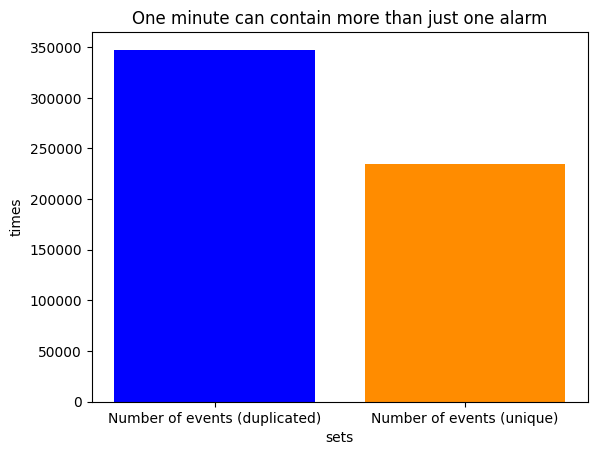

In [22]:
plt.bar(['Number of events (duplicated)', 'Number of events (unique)'], [data.shape[0], data.DateTime.nunique()], color = ["blue", "darkorange"])
plt.title('One minute can contain more than just one alarm')
plt.xlabel("sets")
plt.ylabel("times")

# Only alarms

In [99]:
data = pd.read_csv('./dataframes/clean_data.csv')
data.head()

,Unnamed: 0,DateTime,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,...,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences
0,0,2022-01-03 05:49:49,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,...,2022-01,NaN,1,0,0,1,NaN,0,0.0,0
1,1,2022-01-03 08:41:45,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,...,2022-01,10316.0,1,0,0,1,1.0,0,0.0,0
2,2,2022-01-03 08:44:22,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,...,2022-01,157.0,0,0,1,1,1.0,0,0.0,0
3,3,2022-01-03 08:46:40,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,...,2022-01,138.0,0,0,1,1,1.0,0,0.0,0
4,4,2022-01-03 09:07:11,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,...,2022-01,1231.0,1,0,0,1,1.0,0,0.0,0


In [100]:
data_all = pd.DataFrame(data.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'times'})

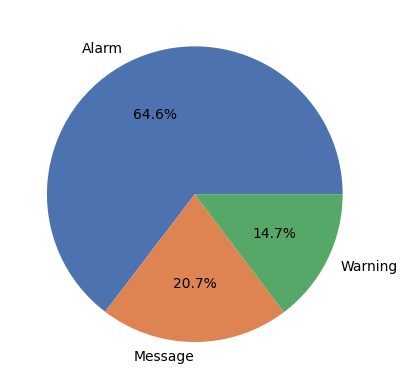

In [101]:
df_type = data.groupby(['Type'])['Type'].count()
df_type = pd.DataFrame(df_type)

colors = sns.color_palette('deep')[0:5]
plt.pie(df_type['Type'], colors=colors, labels=['Alarm', 'Message','Warning'], autopct='%1.1f%%')
plt.show()


In [102]:
data = data[data['Type'] == 'Alarm']
data.shape

(224570, 43)

In [103]:
data_reduced = pd.DataFrame(data.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'times'})

In [104]:
data = data[['DateTime', 'MsgNr', 'Component', 'Plant']]
data.head()

,DateTime,MsgNr,Component,Plant
7,2022-01-03 09:17:48,9219,NaN,ACON/E-Welle
8,2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager
9,2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...
10,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...
11,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager


In [105]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['time_diff'] = data.groupby('MsgNr')['DateTime'].diff()
data[:10]

,DateTime,MsgNr,Component,Plant,time_diff
7,2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,NaT
8,2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,NaT
9,2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,NaT
10,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,0 days 00:02:05
11,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,0 days 00:11:15
12,2022-01-03 09:53:36,49317,Kupolofen,BiMi-Lager,0 days 00:14:18
13,2022-01-03 10:00:21,18023,UV015,LiniensÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â...,NaT
14,2022-01-03 10:03:25,24324,.10-63.26A3,Abfallbeh. UV42,NaT
16,2022-01-03 10:10:01,9218,NaN,ACON/E-Welle,NaT
17,2022-01-03 10:10:22,9218,NaN,ACON/E-Welle,0 days 00:00:21


In [106]:
df = data.copy()

In [107]:
df = df[df['time_diff'] > pd.Timedelta(minutes=1)]

In [108]:
df.shape

(99744, 5)

In [109]:
data_duplicated = pd.DataFrame(df.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'times'})

In [110]:
df['time_diff_plant'] = df.groupby('Plant')['DateTime'].diff()
df[:10]

,DateTime,MsgNr,Component,Plant,time_diff,time_diff_plant
10,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,0 days 00:02:05,NaT
11,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,0 days 00:11:15,NaT
12,2022-01-03 09:53:36,49317,Kupolofen,BiMi-Lager,0 days 00:14:18,0 days 00:14:18
18,2022-01-03 10:11:28,9218,NaN,ACON/E-Welle,0 days 00:01:06,NaT
21,2022-01-03 10:31:02,9218,NaN,ACON/E-Welle,0 days 00:19:34,0 days 00:19:34
22,2022-01-03 10:44:42,4203,NaN,Rekuperator,0 days 00:13:52,NaT
24,2022-01-03 10:54:22,24324,.10-63.26A3,Abfallbeh. UV42,0 days 00:50:57,NaT
25,2022-01-03 10:55:39,49317,Kupolofen,BiMi-Lager,0 days 01:02:03,0 days 01:02:03
26,2022-01-03 10:59:57,4203,NaN,Rekuperator,0 days 00:15:15,0 days 00:15:15
27,2022-01-03 11:23:14,49317,Kupolofen,BiMi-Lager,0 days 00:27:35,0 days 00:27:35


In [111]:
df = df[df['time_diff_plant'] > pd.Timedelta(minutes=1)]

In [112]:
df.isna().sum()

DateTime               0
MsgNr                  0
Component          26832
Plant                  0
time_diff              0
time_diff_plant        0
dtype: int64

In [113]:
df['time_diff_previous'] = df['DateTime'].diff()
df.head()

,DateTime,MsgNr,Component,Plant,time_diff,time_diff_plant,time_diff_previous
12,2022-01-03 09:53:36,49317,Kupolofen,BiMi-Lager,0 days 00:14:18,0 days 00:14:18,NaT
21,2022-01-03 10:31:02,9218,NaN,ACON/E-Welle,0 days 00:19:34,0 days 00:19:34,0 days 00:37:26
25,2022-01-03 10:55:39,49317,Kupolofen,BiMi-Lager,0 days 01:02:03,0 days 01:02:03,0 days 00:24:37
26,2022-01-03 10:59:57,4203,NaN,Rekuperator,0 days 00:15:15,0 days 00:15:15,0 days 00:04:18
27,2022-01-03 11:23:14,49317,Kupolofen,BiMi-Lager,0 days 00:27:35,0 days 00:27:35,0 days 00:23:17


In [114]:
df.shape

(81212, 7)

In [115]:
df["seconds"] = df["time_diff_previous"].apply(lambda x: x.total_seconds())

In [116]:
df = df.drop(columns=['time_diff', 'time_diff_previous', 'time_diff_plant', 'Plant', 'Component'])

In [117]:
df[:10]

,DateTime,MsgNr,seconds
12,2022-01-03 09:53:36,49317,NaN
21,2022-01-03 10:31:02,9218,2246.0
25,2022-01-03 10:55:39,49317,1477.0
26,2022-01-03 10:59:57,4203,258.0
27,2022-01-03 11:23:14,49317,1397.0
29,2022-01-03 11:41:06,49317,1072.0
30,2022-01-03 11:53:45,49317,759.0
31,2022-01-03 12:12:59,49317,1154.0
33,2022-01-03 13:06:56,9218,3237.0
36,2022-01-03 13:13:01,49317,365.0


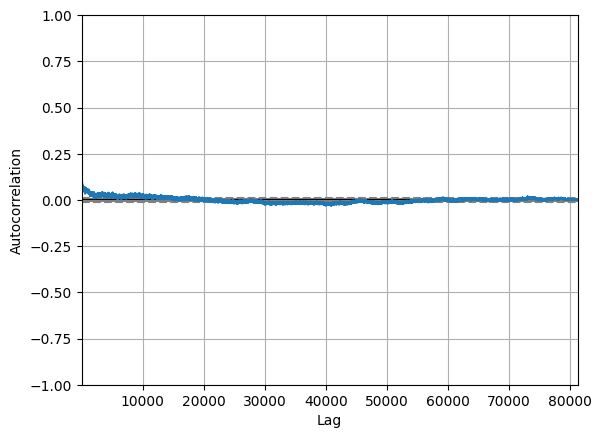

In [118]:
from pandas.plotting import autocorrelation_plot
df['DateTime'] = pd.to_datetime(df['DateTime'])

df = df.set_index('DateTime')

autocorrelation_plot(df['MsgNr'])
plt.show()

In [119]:
data = df.copy()

In [120]:
data.head()

,MsgNr,seconds
DateTime,,
2022-01-03 09:53:36,49317,NaN
2022-01-03 10:31:02,9218,2246.0
2022-01-03 10:55:39,49317,1477.0
2022-01-03 10:59:57,4203,258.0
2022-01-03 11:23:14,49317,1397.0


In [122]:
data.drop(columns=['seconds'], inplace=True)
data[:15]

,MsgNr
DateTime,
2022-01-03 09:53:36,49317
2022-01-03 10:31:02,9218
2022-01-03 10:55:39,49317
2022-01-03 10:59:57,4203
2022-01-03 11:23:14,49317
2022-01-03 11:41:06,49317
2022-01-03 11:53:45,49317
2022-01-03 12:12:59,49317
2022-01-03 13:06:56,9218


In [76]:
data[:15]

,MsgNr,seconds
DateTime,,
2022-01-03 09:53:36,49317,NaN
2022-01-03 10:31:02,9218,2246.0
2022-01-03 10:55:39,49317,1477.0
2022-01-03 10:59:57,4203,258.0
2022-01-03 11:23:14,49317,1397.0
2022-01-03 11:41:06,49317,1072.0
2022-01-03 11:53:45,49317,759.0
2022-01-03 12:12:59,49317,1154.0
2022-01-03 13:06:56,9218,3237.0


In [109]:
df_hourly = df.resample('H')['MsgNr'].apply(list)

In [108]:
df_hourly[12]

[49317, 9219, 49317, 49317]

In [77]:
df.seconds.mean()

418.73523291179765

In [78]:
df_zeros = df[df["seconds"] == 0]

In [79]:
df_zeros

,MsgNr,seconds
DateTime,,
2022-01-06 01:43:35,11227,0.0
2022-01-07 22:03:20,49317,0.0
2022-01-11 11:25:14,24324,0.0
2022-01-19 07:35:25,49317,0.0
2022-01-29 08:13:02,22022,0.0
...,...,...
2022-10-26 13:50:07,6280,0.0
2022-10-30 16:28:04,6280,0.0
2022-10-30 16:34:39,6280,0.0


In [81]:
grouped = df_zeros.groupby('DateTime')['MsgNr'].count()

In [83]:
len(df_zeros.index.unique())

102

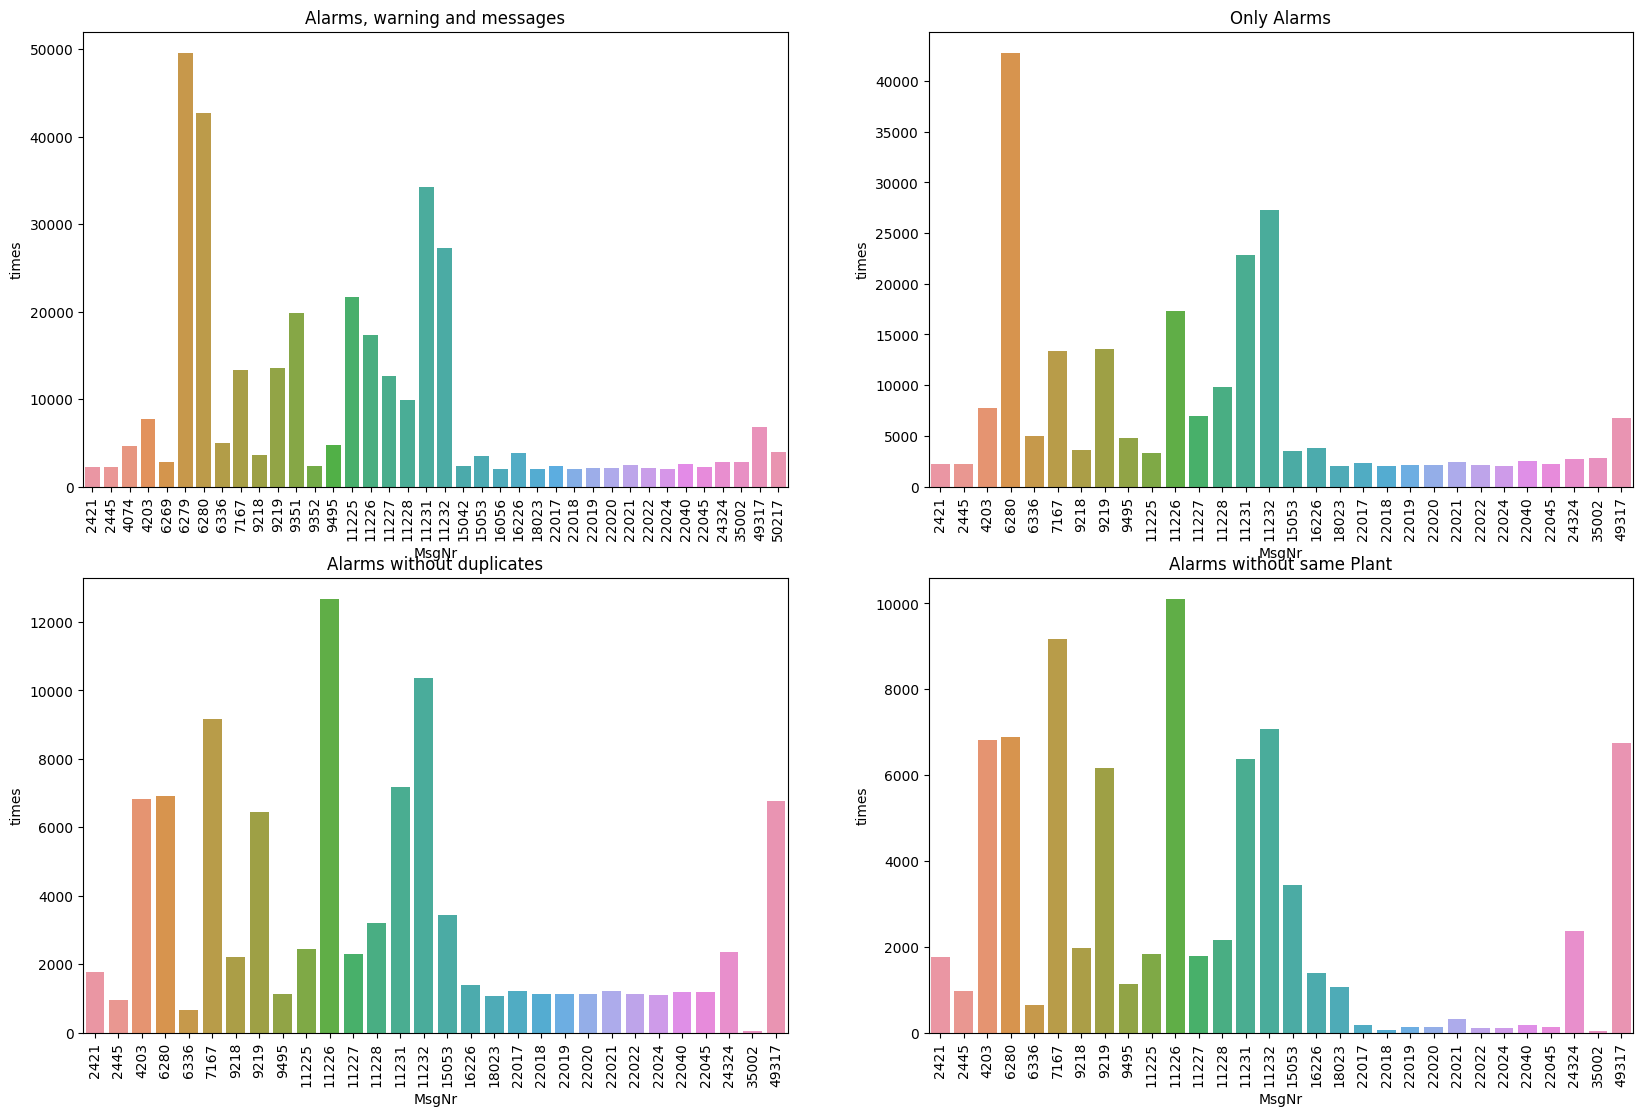

In [123]:
fig, axs = plt.subplots(ncols= 2, nrows =2, figsize=(20,13))


sns.barplot(data=data_all, x=data_all.index, y='times', ax=axs[0,0])
axs[0,0].tick_params(axis='x', labelrotation=90)
axs[0,0].set_title("Alarms, warning and messages")

sns.barplot(data=data_reduced, x=data_reduced.index, y='times', ax=axs[0,1])
axs[0,1].tick_params(axis='x', labelrotation=90)
axs[0,1].set_title("Only Alarms")

sns.barplot(data=data_duplicated, x=data_duplicated.index, y='times', ax=axs[1,0])
axs[1,0].tick_params(axis='x', labelrotation=90)
axs[1,0].set_title("Alarms without duplicates")

sns.barplot(data=data_filtered, x=data_filtered.index, y='times', ax=axs[1,1])
axs[1,1].tick_params(axis='x', labelrotation=90)
axs[1,1].set_title("Alarms without same Plant")

plt.show()

In [124]:
pivot_df = data.pivot_table(index='DateTime', columns='MsgNr', aggfunc=len, fill_value=0)

In [125]:
pivot_df

MsgNr,2421,2445,4203,6280,6336,7167,9218,9219,9495,11225,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:53:36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-01-03 10:31:02,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 10:55:39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-01-03 10:59:57,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 11:23:14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:53:15,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-31 23:55:07,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-31 23:56:33,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
# pivot_df.to_csv('./dataframes./pivot_alarms.csv')

In [88]:
pivot_df.to_csv('./dataframes./pivot_alarms_cleaned.csv')

In [96]:
df = pivot_df.copy()

In [91]:
df = df.drop(columns=['seconds'])

In [95]:
df

seconds                                                  \
MsgNr                 2421  2445  4203  6280  6336  7167  9218  9219  9495    
DateTime                                                                      
2022-01-03 09:53:36       0     0     0     0     0     0     0     0     0   
2022-01-03 10:31:02       0     0     0     0     0     0     1     0     0   
2022-01-03 10:55:39       0     0     0     0     0     0     0     0     0   
2022-01-03 10:59:57       0     0     1     0     0     0     0     0     0   
2022-01-03 11:23:14       0     0     0     0     0     0     0     0     0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-01-31 23:53:15       0     0     0     0     0     0     0     1     0   
2023-01-31 23:55:07       0     0     0     0     0     0     0     1     0   
2023-01-31 23:56:33       0     0     0     0     0     0     0     0     0   
2023-01-31 23:58:37       0     0     0     0     0     0     0     1     0   
2023-01-31 23:58:43       0     0     0     0     0     0     0     0     0   

                           ...                                            \
MsgNr               11225  ... 22019 22020 22021 22022 22024 22040 22045   
DateTime                   ...                                             
2022-01-03 09:53:36     0  ...     0     0     0     0     0     0     0   
2022-01-03 10:31:02     0  ...     0     0     0     0     0     0     0   
2022-01-03 10:55:39     0  ...     0     0     0     0     0     0     0   
2022-01-03 10:59:57     0  ...     0     0     0     0     0     0     0   
2022-01-03 11:23:14     0  ...     0     0     0     0     0     0     0   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
2023-01-31 23:53:15     0  ...     0     0     0     0     0     0     0   
2023-01-31 23:55:07     0  ...     0     0     0     0     0     0     0   
2023-01-31 23:56:33     0  ...     0     0     1     0     0     0     0   
2023-01-31 23:58:37     0  ...     0     0     0     0     0     0     0   
2023-01-31 23:58:43     0  ...     0     0     0     0     0     1     0   

                                       
MsgNr               24324 35002 49317  
DateTime                               
2022-01-03 09:53:36     0     0     1  
2022-01-03 10:31:02     0     0     0  
2022-01-03 10:55:39     0     0     1  
2022-01-03 10:59:57     0     0     0  
2022-01-03 11:23:14     0     0     1  
...                   ...   ...   ...  
2023-01-31 23:53:15     0     0     0  
2023-01-31 23:55:07     0     0     0  
2023-01-31 23:56:33     0     0     0  
2023-01-31 23:58:37     0     0     0  
2023-01-31 23:58:43     0     0     0  

[81110 rows x 30 columns]

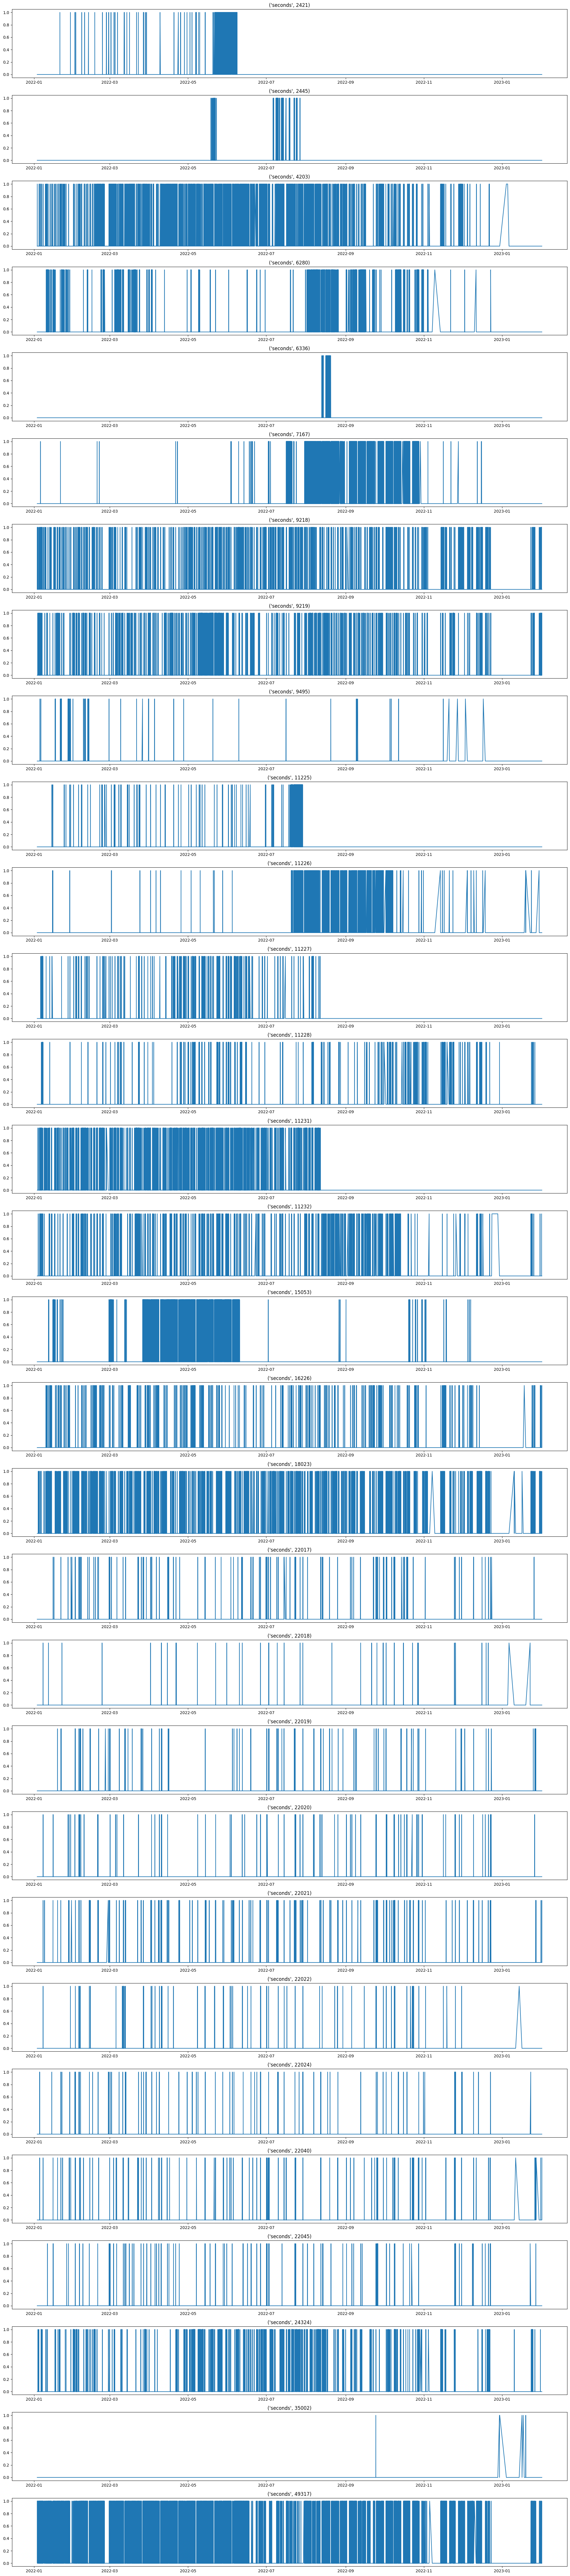

In [97]:

fig, axs = plt.subplots(len(df.columns), 1, figsize=(20, 3*len(df.columns)))

for i, column in enumerate(df.columns):
    axs[i].plot(df[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()